In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data import

In [2]:
chembl_32 = pd.read_excel('ChEMBL_32_documents.xlsx', sheet_name='Sheet1').drop_duplicates(subset='document_chembl_id')

In [3]:
data_chembl = pd.read_csv('ChEMBL_reference.csv', sep=',')
data_chembl = data_chembl.drop_duplicates(subset='document_chembl_id').reset_index(drop=True)

In [4]:
chembl_32_merged = pd.merge(chembl_32, data_chembl, how='left')
data_chembl_core = chembl_32_merged.dropna(subset='PUBMED_TYPE')

In [5]:
core_journals = ['ACS Med Chem Lett', 'Bioorg Med Chem', 'Bioorg Med Chem Lett', 'Eur J Med Chem', 'J Med Chem',
                 'J Nat Prod', 'Medchemcomm']
data_chembl_core = data_chembl_core[data_chembl_core['journal'].isin(core_journals)].reset_index(drop=True)
data_chembl_unclass = pd.concat([chembl_32_merged, data_chembl_core], axis=0).drop_duplicates(keep=False).reset_index(
    drop=True)

In [6]:
data_from_pubmed = pd.read_excel('data_from_pubmed.xlsx', sheet_name='core journals').drop_duplicates(
    subset='PMID').reset_index(drop=True)
data_from_pubmed_refs = pd.read_csv('pubmed_reference.csv', sep=',')
data_from_pubmed = pd.concat([data_from_pubmed, data_from_pubmed_refs], axis=1)

# Data preprocessing (pubmed data)

In [7]:
abstracts_pubmed = pd.read_excel('abstracts_pubmed.xlsx', sheet_name='abstracts')
abstracts_pubmed = abstracts_pubmed.iloc[:, 0]
data_from_pubmed['abstract'] = abstracts_pubmed

In [8]:
data_from_pubmed_main = data_from_pubmed[
    ['PMID', 'Publication Year', 'Authors', 'page1', 'page2', 'Journal/Book', 'reference', 'Title', 'abstract',
     'pubtype ']]

unique_journals = data_from_pubmed_main['Journal/Book'].unique()
for journal in unique_journals:
    data_from_pubmed_main['journal_' + str(journal)] = data_from_pubmed_main['Journal/Book'] == journal

data_from_pubmed_main.replace(True, 1, inplace=True)
data_from_pubmed_main.replace(False, 0, inplace=True)

In [9]:
data_from_pubmed_main['pages'] = data_from_pubmed_main['page2'] - data_from_pubmed_main['page1']

auth_num = []
auth = data_from_pubmed_main['Authors'].values

for string in auth:
    auth_num.append(str(string).count(',') + 1)
data_from_pubmed_main['auth_num'] = np.array(auth_num)

In [10]:
pubmed_data = {'pubmed_id': data_from_pubmed_main['PMID'].values,
               'pages': np.log(data_from_pubmed_main.pages.values + 1),
               'year': data_from_pubmed_main['Publication Year'].values,
               'auth_num': np.log(data_from_pubmed_main.auth_num.values + 1),
               'reference': np.log(data_from_pubmed_main.reference.values + 1),
               'journal_Medchemcomm': data_from_pubmed_main['journal_Medchemcomm'].values,
               'journal_J Nat Prod': data_from_pubmed_main['journal_J Nat Prod'].values,
               'journal_J Med Chem': data_from_pubmed_main['journal_J Med Chem'].values,
               'journal_Eur J Med Chem': data_from_pubmed_main['journal_Eur J Med Chem'].values,
               'journal_Bioorg Med Chem Lett': data_from_pubmed_main['journal_Bioorg Med Chem Lett'].values,
               'journal_Bioorg Med Chem': data_from_pubmed_main['journal_Bioorg Med Chem'].values,
               'journal_ACS Med Chem Lett': data_from_pubmed_main['journal_ACS Med Chem Lett'].values,}

pubmed_df = pd.DataFrame(pubmed_data)

# Data preprocessing (ChEMBL data)

In [11]:
data_chembl_core_main = data_chembl_core[
    ['pubmed_id', 'year', 'authors', 'first_page', 'last_page', 'journal', 'references', 'title', 'abstract',
     'PUBMED_TYPE']]
data_chembl_unclass_main = data_chembl_unclass[
    ['pubmed_id', 'year', 'authors', 'first_page', 'last_page', 'journal', 'references', 'title', 'abstract',
     'PUBMED_TYPE']]

In [12]:
for journal in unique_journals:
    data_chembl_core_main['journal_' + str(journal)] = data_chembl_core_main['journal'] == journal
    data_chembl_unclass_main['journal_' + str(journal)] = data_chembl_unclass_main['journal'] == journal
data_chembl_core_main.replace(True, 1, inplace=True)
data_chembl_core_main.replace(False, 0, inplace=True)
data_chembl_unclass_main.replace(True, 1, inplace=True)
data_chembl_unclass_main.replace(False, 0, inplace=True)

In [13]:
data_chembl_core_main['pages'] = data_chembl_core_main['last_page'] - data_chembl_core_main['first_page']

auth_num = []
auth = data_chembl_core_main['authors'].values

for string in auth:
    auth_num.append(str(string).count(',') + 1)
data_chembl_core_main['auth_num'] = np.array(auth_num)

In [14]:
data_chembl_unclass_main['pages'] = data_chembl_unclass_main['last_page'] - data_chembl_unclass_main['first_page']

auth_num = []
auth = data_chembl_unclass_main['authors'].values

for string in auth:
    auth_num.append(str(string).count(',') + 1)
data_chembl_unclass_main['auth_num'] = np.array(auth_num)

In [15]:
chembl_core_data = {'pubmed_id': data_chembl_core_main['pubmed_id'].values,
                    'pages': np.log(data_chembl_core_main.pages.values + 1),
                    'year': data_chembl_core_main['year'].values,
                    'auth_num': np.log(data_chembl_core_main.auth_num.values + 1),
                    'reference': np.log(data_chembl_core_main.references.values + 1),
                    'journal_Medchemcomm': data_chembl_core_main['journal_Medchemcomm'].values,
                    'journal_J Nat Prod': data_chembl_core_main['journal_J Nat Prod'].values,
                    'journal_J Med Chem': data_chembl_core_main['journal_J Med Chem'].values,
                    'journal_Eur J Med Chem': data_chembl_core_main['journal_Eur J Med Chem'].values,
                    'journal_Bioorg Med Chem Lett': data_chembl_core_main['journal_Bioorg Med Chem Lett'].values,
                    'journal_Bioorg Med Chem': data_chembl_core_main['journal_Bioorg Med Chem'].values,
                    'journal_ACS Med Chem Lett': data_chembl_core_main['journal_ACS Med Chem Lett'].values}

chembl_core_df = pd.DataFrame(chembl_core_data)

In [16]:
chembl_unclass_data = {'pubmed_id': data_chembl_unclass_main['pubmed_id'].values,
                       'pages': np.log(data_chembl_unclass_main.pages.values + 1),
                       'year': data_chembl_unclass_main['year'].values,
                       'auth_num': np.log(data_chembl_unclass_main.auth_num.values + 1),
                       'reference': np.log(data_chembl_unclass_main.references.values + 1),
                       'journal_Medchemcomm': data_chembl_unclass_main['journal_Medchemcomm'].values,
                       'journal_J Nat Prod': data_chembl_unclass_main['journal_J Nat Prod'].values,
                       'journal_J Med Chem': data_chembl_unclass_main['journal_J Med Chem'].values,
                       'journal_Eur J Med Chem': data_chembl_unclass_main['journal_Eur J Med Chem'].values,
                       'journal_Bioorg Med Chem Lett': data_chembl_unclass_main['journal_Bioorg Med Chem Lett'].values,
                       'journal_Bioorg Med Chem': data_chembl_unclass_main['journal_Bioorg Med Chem'].values,
                       'journal_ACS Med Chem Lett': data_chembl_unclass_main['journal_ACS Med Chem Lett'].values}

chembl_unclass_df = pd.DataFrame(chembl_unclass_data)

In [17]:
pubmed_df['class'] = data_from_pubmed_main['pubtype '].values
chembl_core_df['class'] = data_chembl_core_main.PUBMED_TYPE.values
chembl_unclass_df['class'] = data_chembl_unclass_main.PUBMED_TYPE.values

pubmed_df['title'] = data_from_pubmed_main.Title.values
chembl_core_df['title'] = data_chembl_core_main.title.values
chembl_unclass_df['title'] = data_chembl_unclass_main.title.values

pubmed_df['abstract'] = data_from_pubmed_main.abstract.values
chembl_core_df['abstract'] = data_chembl_core_main.abstract.values
chembl_unclass_df['abstract'] = data_chembl_unclass_main.abstract.values

In [18]:
classified_df = pd.concat([pubmed_df, chembl_core_df], axis=0).drop_duplicates(subset='pubmed_id').reset_index(
    drop=True)

unique_class = classified_df['class'].unique()
for cl in unique_class:
    if cl == 'Review':
        classified_df['class'].replace(cl, 1, inplace=True)
    else:
        classified_df['class'].replace(cl, 0, inplace=True)

In [19]:
array_of_mistakes = np.array([26985286, 35059113, 35059117, 35178165, 35178167, 34606998, 35059114, 
                              35178166, 35059115, 35059116, 35178168, 35300084, 35300085])

chembl_unclass_df.loc[chembl_unclass_df['pubmed_id'].isin(array_of_mistakes), 'abstract'] = np.nan

# PubmedBERT vectorisation

In [20]:
classified_df['abstract'].fillna('[MASK]', inplace=True)
chembl_unclass_df['abstract'].fillna('[MASK]', inplace=True)

In [21]:
abstracts_X = list(classified_df['abstract'].values)
titles_X = list(classified_df['title'].values)
texts_X = [f"{t1}. {t2}" for t1, t2 in zip(titles_X, abstracts_X)]
pd.DataFrame(texts_X).to_csv('title_abstract_texts_X.csv', index=False)

In [22]:
all_abstracts = chembl_unclass_df.abstract.values
all_titles = chembl_unclass_df.title.values
all_texts = [f"{t1}. {t2}" for t1, t2 in zip(all_titles, all_abstracts)]
pd.DataFrame(all_texts).to_csv('title_abstract_texts_all.csv', index=False)

In [23]:
cls_X_matrix_pubmed = pd.read_csv('cls_X_matrix_pubmedbert.csv', sep=',')
cls_all_matrix_pubmed = pd.read_csv('cls_all_matrix_pubmedbert.csv', sep=',')

In [24]:
classified_df_vect_pubmed = pd.concat([classified_df, cls_X_matrix_pubmed], axis=1)
classified_df_vect_pubmed = classified_df_vect_pubmed.drop(columns=['title', 'abstract'])
classified_df_vect_pubmed.pages.replace(0, None, inplace=True)
classified_df_vect_pubmed.reference.replace(0, None, inplace=True)

In [25]:
unclassified_df_vect_pubmed = pd.concat([chembl_unclass_df, cls_all_matrix_pubmed], axis=1)
unclassified_df_vect_pubmed = unclassified_df_vect_pubmed.drop(columns=['title', 'abstract'])
unclassified_df_vect_pubmed.pages.replace(0, None, inplace=True)
unclassified_df_vect_pubmed.reference.replace(0, None, inplace=True)

# Model training

In [26]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
X_train_pubmed, X_test_pubmed, y_train_pubmed, y_test_pubmed = train_test_split(
    classified_df_vect_pubmed.drop(columns=['class', 'pubmed_id']), classified_df_vect_pubmed['class'], test_size=0.2,
    random_state=42, stratify=classified_df_vect_pubmed['class'])

import random

np.random.seed(42)

model = xgb.XGBClassifier()

param_grid = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.001, 0.1),
    'subsample': stats.uniform(0.3, 0.7),
    'n_estimators': stats.randint(50, 200)
}

random_search_pubmed = RandomizedSearchCV(model, param_grid, cv=5, random_state=42, n_iter=10, scoring='f1', verbose=10)
random_search_pubmed.fit(X_train_pubmed.astype(np.float64), y_train_pubmed)

print("Best set of hyperparameters: ", random_search_pubmed.best_params_)
print("Best score: ", random_search_pubmed.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START learning_rate=0.03845401188473625, max_depth=7, n_estimators=64, subsample=0.8123957592679836
[CV 1/5; 1/10] END learning_rate=0.03845401188473625, max_depth=7, n_estimators=64, subsample=0.8123957592679836;, score=0.968 total time=   7.1s
[CV 2/5; 1/10] START learning_rate=0.03845401188473625, max_depth=7, n_estimators=64, subsample=0.8123957592679836
[CV 2/5; 1/10] END learning_rate=0.03845401188473625, max_depth=7, n_estimators=64, subsample=0.8123957592679836;, score=0.968 total time=   6.8s
[CV 3/5; 1/10] START learning_rate=0.03845401188473625, max_depth=7, n_estimators=64, subsample=0.8123957592679836
[CV 3/5; 1/10] END learning_rate=0.03845401188473625, max_depth=7, n_estimators=64, subsample=0.8123957592679836;, score=0.959 total time=   6.9s
[CV 4/5; 1/10] START learning_rate=0.03845401188473625, max_depth=7, n_estimators=64, subsample=0.8123957592679836
[CV 4/5; 1/10] END learning_rate=0.038454

[CV 2/5; 7/10] END learning_rate=0.06218528947223795, max_depth=4, n_estimators=64, subsample=0.619248988951925;, score=0.970 total time=   4.2s
[CV 3/5; 7/10] START learning_rate=0.06218528947223795, max_depth=4, n_estimators=64, subsample=0.619248988951925
[CV 3/5; 7/10] END learning_rate=0.06218528947223795, max_depth=4, n_estimators=64, subsample=0.619248988951925;, score=0.965 total time=   4.1s
[CV 4/5; 7/10] START learning_rate=0.06218528947223795, max_depth=4, n_estimators=64, subsample=0.619248988951925
[CV 4/5; 7/10] END learning_rate=0.06218528947223795, max_depth=4, n_estimators=64, subsample=0.619248988951925;, score=0.967 total time=   4.2s
[CV 5/5; 7/10] START learning_rate=0.06218528947223795, max_depth=4, n_estimators=64, subsample=0.619248988951925
[CV 5/5; 7/10] END learning_rate=0.06218528947223795, max_depth=4, n_estimators=64, subsample=0.619248988951925;, score=0.969 total time=   3.9s
[CV 1/5; 8/10] START learning_rate=0.07951759613930137, max_depth=5, n_estimat

In [28]:
model_first = xgb.XGBClassifier(learning_rate=0.07951759613930137, max_depth=5, n_estimators=157,
                                subsample=0.6599641068895281)
model_first.fit(X_train_pubmed.astype(np.float64), y_train_pubmed)

print(f1_score(y_test_pubmed, model_first.predict(X_test_pubmed.astype(np.float64))))
print(accuracy_score(y_test_pubmed, model_first.predict(X_test_pubmed.astype(np.float64))))
print(precision_score(y_test_pubmed, model_first.predict(X_test_pubmed.astype(np.float64))))
print(recall_score(y_test_pubmed, model_first.predict(X_test_pubmed.astype(np.float64))))
print(confusion_matrix(y_test_pubmed, model_first.predict(X_test_pubmed.astype(np.float64))))

0.9800148038490007
0.9844470046082949
0.992503748125937
0.9678362573099415
[[1047    5]
 [  22  662]]


In [29]:
chembl_without_pubmed = pd.concat([classified_df_vect_pubmed, unclassified_df_vect_pubmed], axis=0).drop_duplicates(
    subset='pubmed_id')
chembl_32_toclass = pd.merge(chembl_32[['pubmed_id', 'document_chembl_id']], chembl_without_pubmed, how='left')

classification_previous = model_first.predict(
    chembl_32_toclass.drop(columns=['pubmed_id', 'document_chembl_id', 'class']).astype(np.float64))
predictions_previous = model_first.predict_proba(
    chembl_32_toclass.drop(columns=['pubmed_id', 'document_chembl_id', 'class']).astype(np.float64))
classif_data_previous = {
    'pubmed_id': chembl_32_toclass['pubmed_id'],
    'document_chembl_id': chembl_32_toclass['document_chembl_id'],
    'class': chembl_32_toclass['class'],
    'classification': classification_previous,
    'proba_0': predictions_previous[:, 0],
    'proba_1': predictions_previous[:, 1],
}
classif_df_previous = pd.DataFrame(classif_data_previous)

In [30]:
classif_df_previous['classification'].value_counts()

classification
0    70726
1     7206
Name: count, dtype: int64

In [31]:
a = unclassified_df_vect_pubmed[unclassified_df_vect_pubmed['journal_Medchemcomm'] == 1]
b = unclassified_df_vect_pubmed[unclassified_df_vect_pubmed['journal_J Nat Prod'] == 1]
c = unclassified_df_vect_pubmed[unclassified_df_vect_pubmed['journal_J Med Chem'] == 1]
d = unclassified_df_vect_pubmed[unclassified_df_vect_pubmed['journal_Eur J Med Chem'] == 1]
e = unclassified_df_vect_pubmed[unclassified_df_vect_pubmed['journal_Bioorg Med Chem Lett'] == 1]
f = unclassified_df_vect_pubmed[unclassified_df_vect_pubmed['journal_Bioorg Med Chem'] == 1]
g = unclassified_df_vect_pubmed[unclassified_df_vect_pubmed['journal_ACS Med Chem Lett'] == 1]

unclassified_df_core_j = pd.concat([a, b, c, d, e, f, g], axis=0)

In [32]:
X_train_chembl, X_test_chembl, y_train_chembl, y_test_chembl = train_test_split(
    classified_df_vect_pubmed.drop(columns=['class']), classified_df_vect_pubmed['class'], test_size=0.20,
    random_state=42, stratify=classified_df_vect_pubmed['class'])
X_test_chembl_ = pd.concat([X_test_chembl, y_test_chembl], axis=1)[
    pd.concat([X_test_chembl, y_test_chembl], axis=1)['pubmed_id'].isin(chembl_32['pubmed_id'])]

pd.concat(
    [classif_df_previous[classif_df_previous['classification'] == 0][classif_df_previous['class'] != 0]['pubmed_id'],
     X_test_chembl_[X_test_chembl_['class'] == 0]['pubmed_id']], axis=0).sample(n=50, random_state=42).to_csv(
    'cs_50_previous_28_10.csv', index=False)
pd.concat(
    [classif_df_previous[classif_df_previous['classification'] == 1][classif_df_previous['class'] != 1]['pubmed_id'],
     X_test_chembl_[X_test_chembl_['class'] == 1]['pubmed_id']], axis=0).sample(n=50, random_state=42).to_csv(
    'review_50_previous_28_10.csv', index=False)

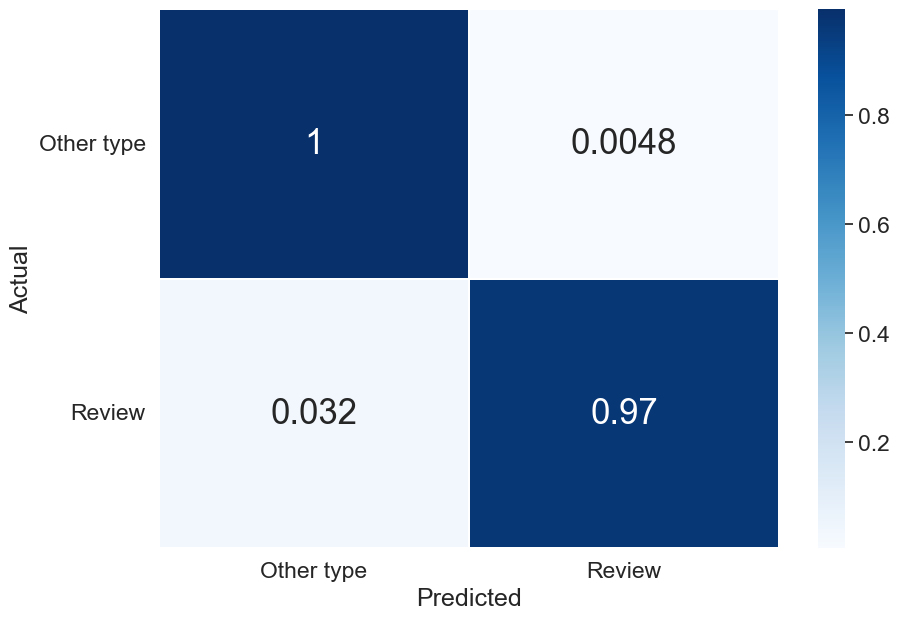

In [33]:
matrix = confusion_matrix(y_test_pubmed, model_first.predict(X_test_pubmed.astype(np.float64)))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.set(font_scale=1.5)
sns.heatmap(matrix, annot=True, annot_kws={'size': 25},
            cmap=plt.cm.Blues, linewidths=0.2)

class_names = ['Other type', 'Review']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks2, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

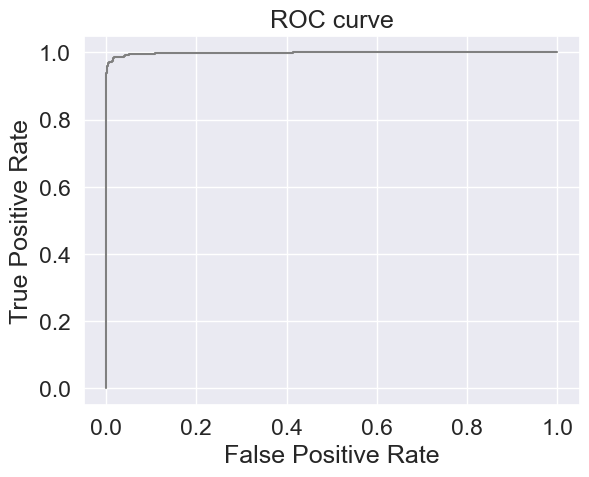

In [34]:
y_pred = model_first.predict_proba(X_test_pubmed.astype(np.float64))[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_pubmed, y_pred)
auc_score = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.3f)' % auc_score, color='grey')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [35]:
sample_cs_previous = pd.concat(
    [classif_df_previous[classif_df_previous['classification'] == 0][classif_df_previous['class'] != 0]['pubmed_id'],
     X_test_chembl_[X_test_chembl_['class'] == 0]['pubmed_id']], axis=0).sample(n=50, random_state=42)
sample_review_previous = pd.concat(
    [classif_df_previous[classif_df_previous['classification'] == 1][classif_df_previous['class'] != 1]['pubmed_id'],
     X_test_chembl_[X_test_chembl_['class'] == 1]['pubmed_id']], axis=0).sample(n=50, random_state=42)
previous_curation = pd.concat([pd.DataFrame(sample_cs_previous), pd.DataFrame(sample_review_previous)],
                              axis=0).reset_index(drop=True)
previous_curation['class'] = np.array([0] * 100)

review_curation = [21044842, 26706173, 16248836, 29133039, 27707603, 27158141, 25333641]
previous_curation.loc[previous_curation['pubmed_id'].isin(review_curation), 'class'] = 1
previous_curation_modification = pd.merge(previous_curation, chembl_32_toclass.drop(columns=['class']), how='left')

# OOD detection

In [36]:
from sklearn.covariance import EmpiricalCovariance
from scipy.spatial.distance import mahalanobis

cov = EmpiricalCovariance().fit(
    classified_df_vect_pubmed.drop(columns=['pubmed_id', 'class']).dropna().astype(np.float64))
cov_matrix = cov.covariance_
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean = np.mean(classified_df_vect_pubmed.drop(columns=['pubmed_id', 'class']).dropna().astype(np.float64), axis=0)


def mahalanobis_distance(x, mean, inv_cov_matrix):
    return mahalanobis(x, mean, inv_cov_matrix)


distances = [mahalanobis_distance(x, mean, inv_cov_matrix) for x in
             unclassified_df_core_j.drop(columns=['pubmed_id', 'class']).dropna().astype(np.float64).values]

threshold = np.percentile(distances, 90)
ood_indices = [i for i, d in enumerate(distances) if d > threshold]
ood_data = unclassified_df_core_j.drop(columns=['class']).dropna().astype(np.float64).iloc[ood_indices]

In [37]:
all_pubtypes = pd.read_csv('all_pubtypes.csv', sep=',')
new_column_names = {old_name: f'class {i + 1}' for i, old_name in enumerate(all_pubtypes.columns)}
all_pubtypes.rename(columns=new_column_names, inplace=True)
all_pubtypes = pd.concat([chembl_32['pubmed_id'], all_pubtypes], axis=1)

In [38]:
labels = np.array(["Research Support, Non-U.S. Gov't", "Research Support, U.S. Gov't, P.H.S.",
                   "Research Support, U.S. Gov't, Non-P.H.S.", "Research Support, N.I.H., Extramural",
                   "Research Support, N.I.H., Intramural"])


def contains_only_labels(row, labels):
    return all(item in labels or pd.isna(item) for item in row.values)


research_supports_ood = pd.merge(ood_data, all_pubtypes, how='left')[
    pd.merge(ood_data, all_pubtypes, how='left').iloc[:, -5:].apply(lambda row: contains_only_labels(row, labels),
                                                                    axis=1)].dropna(
    subset=['class 1', 'class 2']).reset_index(drop=True)

# Manual curation of research supports

In [39]:
pd.merge(research_supports_ood, classif_df_previous, how='left')[
    pd.merge(research_supports_ood, classif_df_previous, how='left')['classification'] == 1]['pubmed_id'].to_csv(
    'previous_review_check_28_10.csv', index=False)
pd.merge(research_supports_ood, classif_df_previous, how='left')[
    pd.merge(research_supports_ood, classif_df_previous, how='left')['classification'] == 0]['pubmed_id'].sample(n=50,
                                                                                                                 random_state=50).to_csv(
    'previous_50_cs_check_28_10.csv', index=False)

# Adding data to a dataset and training the model

In [40]:
classified_df_modified = pd.concat([classified_df_vect_pubmed, research_supports_ood.iloc[:, :-5],
                                    previous_curation_modification.drop(columns=['document_chembl_id'])],
                                   axis=0).drop_duplicates(subset='pubmed_id').reset_index(drop=True)
classified_df_modified['class'].fillna(0, inplace=True)

review_supports = [20096591, 26125082]
classified_df_modified.loc[classified_df_modified['pubmed_id'].isin(review_supports), 'class'] = 1

In [41]:
X_train_pubmed_modified, X_test_pubmed_modified, y_train_pubmed_modified, y_test_pubmed_modified = train_test_split(
    classified_df_modified.drop(columns=['class', 'pubmed_id']), classified_df_modified['class'], test_size=0.2,
    random_state=42, stratify=classified_df_modified['class'])

model = xgb.XGBClassifier()
np.random.seed(4238)

param_grid = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.001, 0.1),
    'subsample': stats.uniform(0.3, 0.7),
    'n_estimators': stats.randint(50, 200)
}

random_search_pubmed_modified = RandomizedSearchCV(model, param_grid, cv=5, n_iter=10, random_state=4238, scoring='f1',
                                                   verbose=10)
random_search_pubmed_modified.fit(X_train_pubmed_modified.astype(np.float64), y_train_pubmed_modified)

print("Best set of hyperparameters: ", random_search_pubmed_modified.best_params_)
print("Best score: ", random_search_pubmed_modified.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START learning_rate=0.04625377795442797, max_depth=6, n_estimators=93, subsample=0.30727885348139
[CV 1/5; 1/10] END learning_rate=0.04625377795442797, max_depth=6, n_estimators=93, subsample=0.30727885348139;, score=0.975 total time=   7.6s
[CV 2/5; 1/10] START learning_rate=0.04625377795442797, max_depth=6, n_estimators=93, subsample=0.30727885348139
[CV 2/5; 1/10] END learning_rate=0.04625377795442797, max_depth=6, n_estimators=93, subsample=0.30727885348139;, score=0.954 total time=   7.7s
[CV 3/5; 1/10] START learning_rate=0.04625377795442797, max_depth=6, n_estimators=93, subsample=0.30727885348139
[CV 3/5; 1/10] END learning_rate=0.04625377795442797, max_depth=6, n_estimators=93, subsample=0.30727885348139;, score=0.964 total time=   7.9s
[CV 4/5; 1/10] START learning_rate=0.04625377795442797, max_depth=6, n_estimators=93, subsample=0.30727885348139
[CV 4/5; 1/10] END learning_rate=0.04625377795442797, m

[CV 2/5; 7/10] END learning_rate=0.041393656115859656, max_depth=6, n_estimators=151, subsample=0.5237245159453631;, score=0.963 total time=  12.7s
[CV 3/5; 7/10] START learning_rate=0.041393656115859656, max_depth=6, n_estimators=151, subsample=0.5237245159453631
[CV 3/5; 7/10] END learning_rate=0.041393656115859656, max_depth=6, n_estimators=151, subsample=0.5237245159453631;, score=0.965 total time=  12.9s
[CV 4/5; 7/10] START learning_rate=0.041393656115859656, max_depth=6, n_estimators=151, subsample=0.5237245159453631
[CV 4/5; 7/10] END learning_rate=0.041393656115859656, max_depth=6, n_estimators=151, subsample=0.5237245159453631;, score=0.965 total time=  13.3s
[CV 5/5; 7/10] START learning_rate=0.041393656115859656, max_depth=6, n_estimators=151, subsample=0.5237245159453631
[CV 5/5; 7/10] END learning_rate=0.041393656115859656, max_depth=6, n_estimators=151, subsample=0.5237245159453631;, score=0.971 total time=  13.1s
[CV 1/5; 8/10] START learning_rate=0.05348936337599051, m

In [42]:
model_second = xgb.XGBClassifier(learning_rate=0.06642117979801292, max_depth=7, n_estimators=153,
                                 subsample=0.7065714025708345)
model_second.fit(X_train_pubmed_modified.astype(np.float64), y_train_pubmed_modified)

print(f1_score(y_test_pubmed_modified, model_second.predict(X_test_pubmed_modified.astype(np.float64))))
print(accuracy_score(y_test_pubmed_modified, model_second.predict(X_test_pubmed_modified.astype(np.float64))))
print(precision_score(y_test_pubmed_modified, model_second.predict(X_test_pubmed_modified.astype(np.float64))))
print(recall_score(y_test_pubmed_modified, model_second.predict(X_test_pubmed_modified.astype(np.float64))))
print(confusion_matrix(y_test_pubmed_modified, model_second.predict(X_test_pubmed_modified.astype(np.float64))))

0.9704579025110783
0.9785407725321889
0.9820627802690582
0.9591240875912409
[[1167   12]
 [  28  657]]


In [43]:
classification_second = model_second.predict(
    chembl_32_toclass.drop(columns=['pubmed_id', 'document_chembl_id', 'class']).astype(np.float64))
predictions_second = model_second.predict_proba(
    chembl_32_toclass.drop(columns=['pubmed_id', 'document_chembl_id', 'class']).astype(np.float64))
classif_data_second = {
    'pubmed_id': chembl_32_toclass['pubmed_id'],
    'document_chembl_id': chembl_32_toclass['document_chembl_id'],
    'class': chembl_32_toclass['class'],
    'classification': classification_second,
    'proba_0': predictions_second[:, 0],
    'proba_1': predictions_second[:, 1],
}
classif_df_second = pd.DataFrame(classif_data_second)

In [44]:
classif_df_second['classification'].value_counts()

classification
0    74395
1     3537
Name: count, dtype: int64

In [45]:
X_train_chembl_second, X_test_chembl_second, y_train_chembl_second, y_test_chembl_second = train_test_split(
    classified_df_modified.drop(columns=['class']), classified_df_modified['class'], test_size=0.20, random_state=42,
    stratify=classified_df_modified['class'])
X_test_chembl_second_ = pd.concat([X_test_chembl_second, y_test_chembl_second], axis=1)[
    pd.concat([X_test_chembl_second, y_test_chembl_second], axis=1)['pubmed_id'].isin(chembl_32['pubmed_id'])]

pd.concat([classif_df_second[classif_df_second['classification'] == 0][classif_df_second['class'] != 0]['pubmed_id'],
           X_test_chembl_second_[X_test_chembl_second_['class'] == 0]['pubmed_id']], axis=0).sample(n=50,
                                                                                                    random_state=42).to_csv(
    'cs_50_second_28_10.csv', index=False)
pd.concat([classif_df_second[classif_df_second['classification'] == 1][classif_df_second['class'] != 1]['pubmed_id'],
           X_test_chembl_second_[X_test_chembl_second_['class'] == 1]['pubmed_id']], axis=0).sample(n=50,
                                                                                                    random_state=42).to_csv(
    'review_50_second_28_10.csv', index=False)

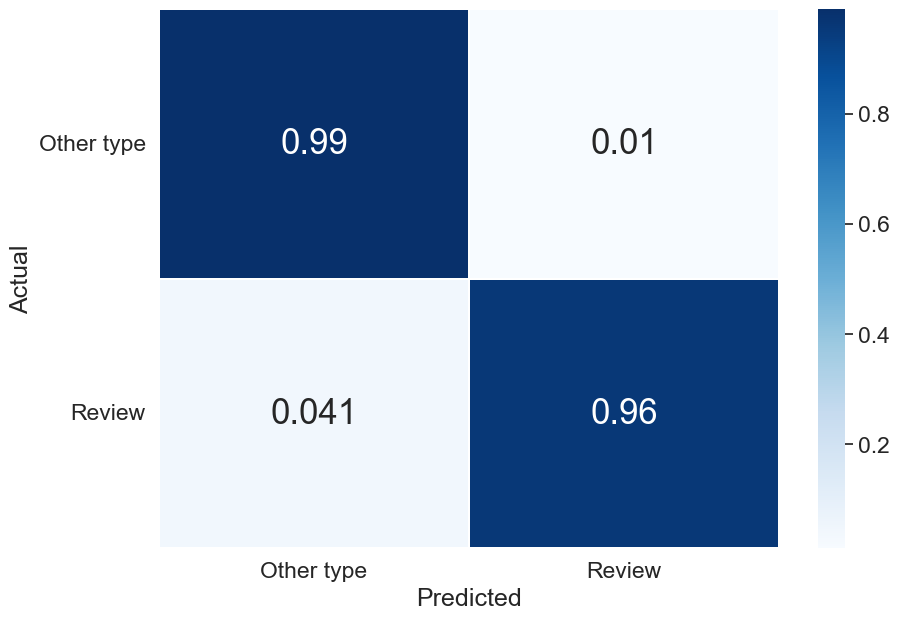

In [46]:
matrix = confusion_matrix(y_test_pubmed_modified, model_second.predict(X_test_pubmed_modified.astype(np.float64)))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.set(font_scale=1.5)
sns.heatmap(matrix, annot=True, annot_kws={'size': 25},
            cmap=plt.cm.Blues, linewidths=0.2)

class_names = ['Other type', 'Review']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks2, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

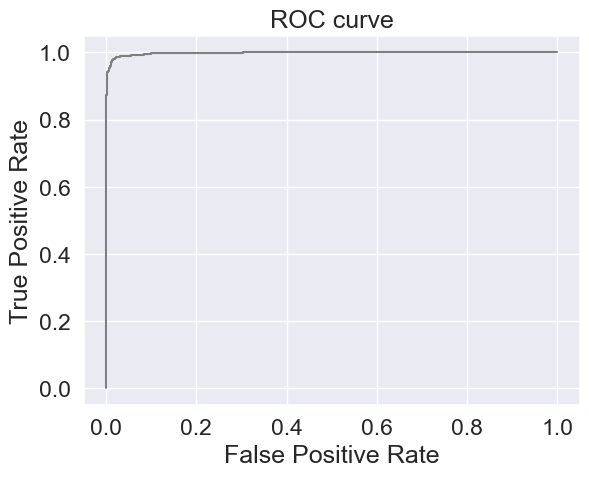

In [47]:
y_pred = model_second.predict_proba(X_test_pubmed_modified.astype(np.float64))[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_pubmed_modified, y_pred)
auc_score = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.3f)' % auc_score, color='grey')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [48]:
sample_cs_second = pd.concat(
    [classif_df_second[classif_df_second['classification'] == 0][classif_df_second['class'] != 0]['pubmed_id'],
     X_test_chembl_second_[X_test_chembl_second_['class'] == 0]['pubmed_id']], axis=0).sample(n=50, random_state=42)
sample_review_second = pd.concat(
    [classif_df_second[classif_df_second['classification'] == 1][classif_df_second['class'] != 1]['pubmed_id'],
     X_test_chembl_second_[X_test_chembl_second_['class'] == 1]['pubmed_id']], axis=0).sample(n=50, random_state=42)
second_curation = pd.concat([pd.DataFrame(sample_cs_second), pd.DataFrame(sample_review_second)], axis=0).reset_index(
    drop=True)
second_curation['class'] = np.array([0] * 100)
second_curation

review_curation_second = [22222036, 30633510, 21780776, 21616672, 25173852, 22236250, 18828573, 29605809, 17095225]
second_curation.loc[second_curation['pubmed_id'].isin(review_curation_second), 'class'] = 1
second_curation_modification = pd.merge(second_curation, chembl_32_toclass.drop(columns=['class']), how='left')

# Second OOD detection

In [49]:
unclassified_df_core_j_second = unclassified_df_core_j[~unclassified_df_core_j['pubmed_id'].isin(ood_data['pubmed_id'])]
cov_second = EmpiricalCovariance().fit(
    classified_df_modified.drop(columns=['pubmed_id', 'class']).dropna().astype(np.float64))
cov_matrix_second = cov_second.covariance_
inv_cov_matrix_second = np.linalg.inv(cov_matrix_second)
mean_second = np.mean(classified_df_modified.drop(columns=['pubmed_id', 'class']).dropna().astype(np.float64), axis=0)

distances_second = [mahalanobis_distance(x, mean_second, inv_cov_matrix_second) for x in
                    unclassified_df_core_j_second.drop(columns=['pubmed_id', 'class']).dropna().astype(
                        np.float64).values]

threshold_second = np.percentile(distances_second, 90)
ood_indices_second = [i for i, d in enumerate(distances_second) if d > threshold_second]
ood_data_second = unclassified_df_core_j_second.drop(columns=['class']).dropna().astype(np.float64).iloc[
    ood_indices_second]

In [50]:
research_supports_ood_second = pd.merge(ood_data_second, all_pubtypes, how='left')[
    pd.merge(ood_data_second, all_pubtypes, how='left').iloc[:, -5:].apply(
        lambda row: contains_only_labels(row, labels), axis=1)].dropna(subset=['class 1', 'class 2']).reset_index(
    drop=True)

# Second manual curation of research supports

In [51]:
pd.merge(research_supports_ood_second, classif_df_second, how='left')[
    pd.merge(research_supports_ood_second, classif_df_second, how='left')['classification'] == 1]['pubmed_id'].to_csv(
    'second_review_check_28_10.csv', index=False)
pd.merge(research_supports_ood_second, classif_df_second, how='left')[
    pd.merge(research_supports_ood_second, classif_df_second, how='left')['classification'] == 0]['pubmed_id'].sample(
    n=50, random_state=50).to_csv('second_50_cs_check_28_10.csv', index=False)

# Second adding data to the dataset and training the model

In [52]:
classified_df_second_modified = pd.concat([classified_df_modified, research_supports_ood_second.iloc[:, :-5],
                                           second_curation_modification.drop(columns=['document_chembl_id'])],
                                          axis=0).drop_duplicates(subset='pubmed_id').reset_index(drop=True)
classified_df_second_modified['class'].fillna(0, inplace=True)

review_supports_second = [24831826, 26356253]
classified_df_second_modified.loc[classified_df_second_modified['pubmed_id'].isin(review_supports_second), 'class'] = 1


In [53]:
X_train_pubmed_second_modified, X_test_pubmed_second_modified, y_train_pubmed_second_modified, y_test_pubmed_second_modified = train_test_split(
    classified_df_second_modified.drop(columns=['class', 'pubmed_id']), classified_df_second_modified['class'],
    test_size=0.2, random_state=42, stratify=classified_df_second_modified['class'])

model = xgb.XGBClassifier()
np.random.seed(4242)

param_grid = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.001, 0.1),
    'subsample': stats.uniform(0.3, 0.7),
    'n_estimators': stats.randint(50, 200)
}

random_search_pubmed_second_modified = RandomizedSearchCV(model, param_grid, cv=5, n_iter=10, random_state=4242,
                                                          scoring='f1', verbose=10)
random_search_pubmed_second_modified.fit(X_train_pubmed_second_modified.astype(np.float64),
                                         y_train_pubmed_second_modified)

print("Best set of hyperparameters: ", random_search_pubmed_second_modified.best_params_)
print("Best score: ", random_search_pubmed_second_modified.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START learning_rate=0.033494948661751345, max_depth=8, n_estimators=195, subsample=0.939805559940359
[CV 1/5; 1/10] END learning_rate=0.033494948661751345, max_depth=8, n_estimators=195, subsample=0.939805559940359;, score=0.966 total time=  22.4s
[CV 2/5; 1/10] START learning_rate=0.033494948661751345, max_depth=8, n_estimators=195, subsample=0.939805559940359
[CV 2/5; 1/10] END learning_rate=0.033494948661751345, max_depth=8, n_estimators=195, subsample=0.939805559940359;, score=0.965 total time=  22.9s
[CV 3/5; 1/10] START learning_rate=0.033494948661751345, max_depth=8, n_estimators=195, subsample=0.939805559940359
[CV 3/5; 1/10] END learning_rate=0.033494948661751345, max_depth=8, n_estimators=195, subsample=0.939805559940359;, score=0.961 total time=  22.6s
[CV 4/5; 1/10] START learning_rate=0.033494948661751345, max_depth=8, n_estimators=195, subsample=0.939805559940359
[CV 4/5; 1/10] END learning_rate=0

[CV 2/5; 7/10] END learning_rate=0.06327561839510829, max_depth=4, n_estimators=147, subsample=0.7551824676220534;, score=0.964 total time=   8.7s
[CV 3/5; 7/10] START learning_rate=0.06327561839510829, max_depth=4, n_estimators=147, subsample=0.7551824676220534
[CV 3/5; 7/10] END learning_rate=0.06327561839510829, max_depth=4, n_estimators=147, subsample=0.7551824676220534;, score=0.967 total time=   8.9s
[CV 4/5; 7/10] START learning_rate=0.06327561839510829, max_depth=4, n_estimators=147, subsample=0.7551824676220534
[CV 4/5; 7/10] END learning_rate=0.06327561839510829, max_depth=4, n_estimators=147, subsample=0.7551824676220534;, score=0.972 total time=   8.9s
[CV 5/5; 7/10] START learning_rate=0.06327561839510829, max_depth=4, n_estimators=147, subsample=0.7551824676220534
[CV 5/5; 7/10] END learning_rate=0.06327561839510829, max_depth=4, n_estimators=147, subsample=0.7551824676220534;, score=0.969 total time=   8.9s
[CV 1/5; 8/10] START learning_rate=0.09134003995547546, max_dept

In [54]:
model_third = xgb.XGBClassifier(learning_rate=0.0946037109802962, max_depth=6, n_estimators=181,
                                subsample=0.8219923502058182)
model_third.fit(X_train_pubmed_second_modified.astype(np.float64), y_train_pubmed_second_modified)

print(f1_score(y_test_pubmed_second_modified, model_third.predict(X_test_pubmed_second_modified.astype(np.float64))))
print(accuracy_score(y_test_pubmed_second_modified, model_third.predict(X_test_pubmed_second_modified.astype(np.float64))))
print(precision_score(y_test_pubmed_second_modified, model_third.predict(X_test_pubmed_second_modified.astype(np.float64))))
print(recall_score(y_test_pubmed_second_modified, model_third.predict(X_test_pubmed_second_modified.astype(np.float64))))
print(confusion_matrix(y_test_pubmed_second_modified, model_third.predict(X_test_pubmed_second_modified.astype(np.float64))))

0.9697416974169741
0.9791029561671764
0.9820627802690582
0.9577259475218659
[[1264   12]
 [  29  657]]


In [55]:
classification_third = model_third.predict(
    chembl_32_toclass.drop(columns=['pubmed_id', 'document_chembl_id', 'class']).astype(np.float64))
predictions_third = model_third.predict_proba(
    chembl_32_toclass.drop(columns=['pubmed_id', 'document_chembl_id', 'class']).astype(np.float64))
classif_data_third = {
    'pubmed_id': chembl_32_toclass['pubmed_id'],
    'document_chembl_id': chembl_32_toclass['document_chembl_id'],
    'class': chembl_32_toclass['class'],
    'classification': classification_third,
    'proba_0': predictions_third[:, 0],
    'proba_1': predictions_third[:, 1],
}
classif_df_third = pd.DataFrame(classif_data_third)

In [56]:
classif_df_third['classification'].value_counts()

classification
0    75378
1     2554
Name: count, dtype: int64

In [57]:
X_train_chembl_third, X_test_chembl_third, y_train_chembl_third, y_test_chembl_third = train_test_split(
    classified_df_second_modified.drop(columns=['class']), classified_df_second_modified['class'], test_size=0.20,
    random_state=42, stratify=classified_df_second_modified['class'])
X_test_chembl_third_ = pd.concat([X_test_chembl_third, y_test_chembl_third], axis=1)[
    pd.concat([X_test_chembl_third, y_test_chembl_third], axis=1)['pubmed_id'].isin(chembl_32['pubmed_id'])]

pd.concat([classif_df_third[classif_df_third['classification'] == 0][classif_df_third['class'] != 0]['pubmed_id'],
           X_test_chembl_third_[X_test_chembl_third_['class'] == 0]['pubmed_id']], axis=0).sample(n=50,
                                                                                                  random_state=42).to_csv(
    'cs_50_third_30_10.csv', index=False)
pd.concat([classif_df_third[classif_df_third['classification'] == 1][classif_df_third['class'] != 1]['pubmed_id'],
           X_test_chembl_third_[X_test_chembl_third_['class'] == 1]['pubmed_id']], axis=0).sample(n=50,
                                                                                                  random_state=42).to_csv(
    'review_50_third_30_10.csv', index=False)

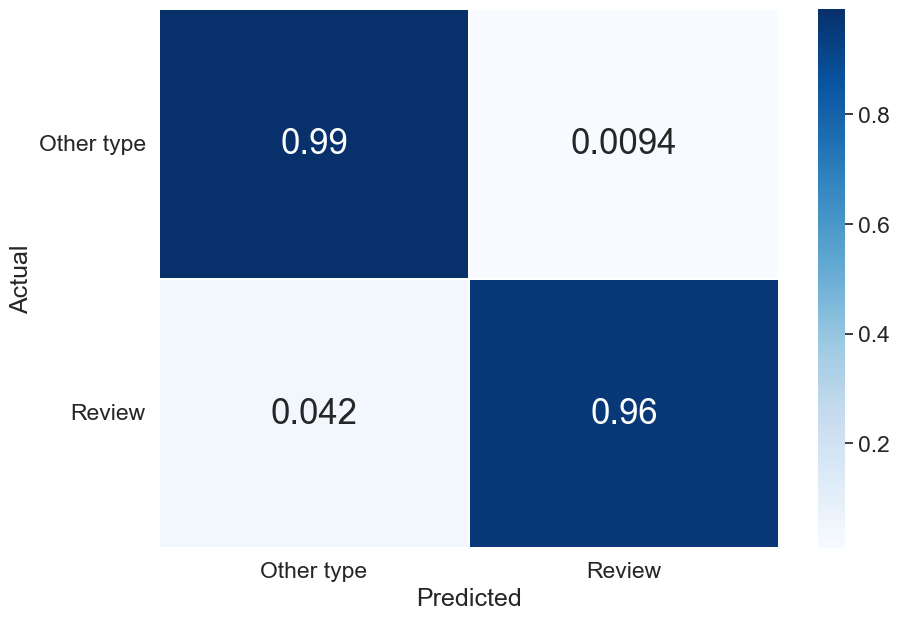

In [58]:
matrix = confusion_matrix(y_test_pubmed_second_modified,
                          model_third.predict(X_test_pubmed_second_modified.astype(np.float64)))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.set(font_scale=1.5)
sns.heatmap(matrix, annot=True, annot_kws={'size': 25},
            cmap=plt.cm.Blues, linewidths=0.2)

class_names = ['Other type', 'Review']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks2, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

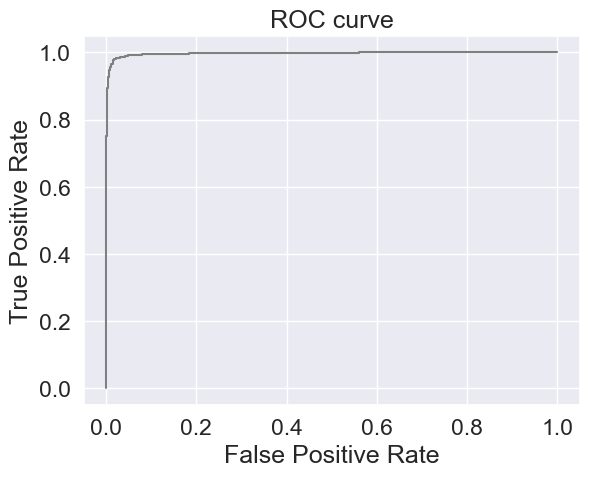

In [59]:
y_pred = model_third.predict_proba(X_test_pubmed_second_modified.astype(np.float64))[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_pubmed_second_modified, y_pred)
auc_score = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.3f)' % auc_score, color='grey')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [60]:
sample_cs_third = pd.concat(
    [classif_df_third[classif_df_third['classification'] == 0][classif_df_third['class'] != 0]['pubmed_id'],
     X_test_chembl_third_[X_test_chembl_third_['class'] == 0]['pubmed_id']], axis=0).sample(n=50, random_state=42)
sample_review_third = pd.concat(
    [classif_df_third[classif_df_third['classification'] == 1][classif_df_third['class'] != 1]['pubmed_id'],
     X_test_chembl_third_[X_test_chembl_third_['class'] == 1]['pubmed_id']], axis=0).sample(n=50, random_state=42)
third_curation = pd.concat([pd.DataFrame(sample_cs_third), pd.DataFrame(sample_review_third)], axis=0).reset_index(
    drop=True)
third_curation['class'] = np.array([0] * 100)

review_curation_third = [25782745, 28285913, 31638805, 22268494, 32738989, 21650152, 21707083, 19239229, 27766140,
                         33062159, 19702275, 30891128, 12147760, 24707857, 34046632, 31913033, 1812209]
third_curation.loc[third_curation['pubmed_id'].isin(review_curation_third), 'class'] = 1
third_curation_modification = pd.merge(third_curation, chembl_32_toclass.drop(columns=['class']), how='left')

# Third OOD detection

In [61]:
unclassified_df_core_j_third = unclassified_df_core_j_second[
    ~unclassified_df_core_j_second['pubmed_id'].isin(ood_data_second['pubmed_id'])]
cov_third = EmpiricalCovariance().fit(
    classified_df_second_modified.drop(columns=['pubmed_id', 'class']).dropna().astype(np.float64))
cov_matrix_third = cov_third.covariance_
inv_cov_matrix_third = np.linalg.inv(cov_matrix_third)
mean_third = np.mean(classified_df_second_modified.drop(columns=['pubmed_id', 'class']).dropna().astype(np.float64),
                     axis=0)

distances_third = [mahalanobis_distance(x, mean_third, inv_cov_matrix_third) for x in
                   unclassified_df_core_j_third.drop(columns=['pubmed_id', 'class']).dropna().astype(np.float64).values]

threshold_third = np.percentile(distances_third, 90)
ood_indices_third = [i for i, d in enumerate(distances_third) if d > threshold_third]
ood_data_third = unclassified_df_core_j_third.drop(columns=['class']).dropna().astype(np.float64).iloc[
    ood_indices_third]

In [62]:
research_supports_ood_third = pd.merge(ood_data_third, all_pubtypes, how='left')[
    pd.merge(ood_data_third, all_pubtypes, how='left').iloc[:, -5:].apply(lambda row: contains_only_labels(row, labels),
                                                                          axis=1)].dropna(
    subset=['class 1', 'class 2']).reset_index(drop=True)

# Third manual curation of research supports 

In [63]:
pd.merge(research_supports_ood_third, classif_df_third, how='left')[
    pd.merge(research_supports_ood_third, classif_df_third, how='left')['classification'] == 1]['pubmed_id'].to_csv(
    'third_review_check_30_10.csv', index=False)
pd.merge(research_supports_ood_third, classif_df_third, how='left')[
    pd.merge(research_supports_ood_third, classif_df_third, how='left')['classification'] == 0]['pubmed_id'].sample(
    n=50, random_state=50).to_csv('third_50_cs_check_28_10.csv', index=False)

# Third adding data to the dataset and training the model

In [64]:
classified_df_third_modified = pd.concat([classified_df_second_modified, research_supports_ood_third.iloc[:, :-5],
                                          third_curation_modification.drop(columns=['document_chembl_id'])],
                                         axis=0).drop_duplicates(subset='pubmed_id').reset_index(drop=True)
classified_df_third_modified['class'].fillna(0, inplace=True)

review_supports_third = [17643302]
classified_df_third_modified.loc[classified_df_third_modified['pubmed_id'].isin(review_supports_third), 'class'] = 1

In [65]:
X_train_pubmed_third_modified, X_test_pubmed_third_modified, y_train_pubmed_third_modified, y_test_pubmed_third_modified = train_test_split(
    classified_df_third_modified.drop(columns=['class', 'pubmed_id']), classified_df_third_modified['class'],
    test_size=0.2, random_state=42, stratify=classified_df_third_modified['class'])

model = xgb.XGBClassifier()
np.random.seed(3842)

param_grid = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.001, 0.1),
    'subsample': stats.uniform(0.3, 0.7),
    'n_estimators': stats.randint(50, 200)
}

random_search_pubmed_third_modified = RandomizedSearchCV(model, param_grid, cv=5, n_iter=10, random_state=3842,
                                                         scoring='f1', verbose=10)
random_search_pubmed_third_modified.fit(X_train_pubmed_third_modified.astype(np.float64), y_train_pubmed_third_modified)

print("Best set of hyperparameters: ", random_search_pubmed_third_modified.best_params_)
print("Best score: ", random_search_pubmed_third_modified.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START learning_rate=0.09488104355159124, max_depth=9, n_estimators=140, subsample=0.4914805817366358
[CV 1/5; 1/10] END learning_rate=0.09488104355159124, max_depth=9, n_estimators=140, subsample=0.4914805817366358;, score=0.974 total time=  14.5s
[CV 2/5; 1/10] START learning_rate=0.09488104355159124, max_depth=9, n_estimators=140, subsample=0.4914805817366358
[CV 2/5; 1/10] END learning_rate=0.09488104355159124, max_depth=9, n_estimators=140, subsample=0.4914805817366358;, score=0.957 total time=  13.8s
[CV 3/5; 1/10] START learning_rate=0.09488104355159124, max_depth=9, n_estimators=140, subsample=0.4914805817366358
[CV 3/5; 1/10] END learning_rate=0.09488104355159124, max_depth=9, n_estimators=140, subsample=0.4914805817366358;, score=0.961 total time=  14.3s
[CV 4/5; 1/10] START learning_rate=0.09488104355159124, max_depth=9, n_estimators=140, subsample=0.4914805817366358
[CV 4/5; 1/10] END learning_rate=0

[CV 2/5; 7/10] END learning_rate=0.035128064942596474, max_depth=4, n_estimators=133, subsample=0.31235282288373467;, score=0.955 total time=   9.0s
[CV 3/5; 7/10] START learning_rate=0.035128064942596474, max_depth=4, n_estimators=133, subsample=0.31235282288373467
[CV 3/5; 7/10] END learning_rate=0.035128064942596474, max_depth=4, n_estimators=133, subsample=0.31235282288373467;, score=0.956 total time=   8.5s
[CV 4/5; 7/10] START learning_rate=0.035128064942596474, max_depth=4, n_estimators=133, subsample=0.31235282288373467
[CV 4/5; 7/10] END learning_rate=0.035128064942596474, max_depth=4, n_estimators=133, subsample=0.31235282288373467;, score=0.970 total time=   8.5s
[CV 5/5; 7/10] START learning_rate=0.035128064942596474, max_depth=4, n_estimators=133, subsample=0.31235282288373467
[CV 5/5; 7/10] END learning_rate=0.035128064942596474, max_depth=4, n_estimators=133, subsample=0.31235282288373467;, score=0.950 total time=   8.9s
[CV 1/5; 8/10] START learning_rate=0.0038692483485

In [66]:
model_fourth = xgb.XGBClassifier(learning_rate=0.07625875317289403, max_depth=7, n_estimators=183,
                                 subsample=0.8792542161451518)
model_fourth.fit(X_train_pubmed_third_modified.astype(np.float64), y_train_pubmed_third_modified)

print(f1_score(y_test_pubmed_third_modified, model_fourth.predict(X_test_pubmed_third_modified.astype(np.float64))))
print(accuracy_score(y_test_pubmed_third_modified, model_fourth.predict(X_test_pubmed_third_modified.astype(np.float64))))
print(precision_score(y_test_pubmed_third_modified, model_fourth.predict(X_test_pubmed_third_modified.astype(np.float64))))
print(recall_score(y_test_pubmed_third_modified, model_fourth.predict(X_test_pubmed_third_modified.astype(np.float64))))
print(confusion_matrix(y_test_pubmed_third_modified, model_fourth.predict(X_test_pubmed_third_modified.astype(np.float64))))

0.9676945668135095
0.9786096256684492
0.9791976225854383
0.9564586357039188
[[1354   14]
 [  30  659]]


In [67]:
classification_fourth = model_fourth.predict(
    chembl_32_toclass.drop(columns=['pubmed_id', 'document_chembl_id', 'class']).astype(np.float64))
predictions_fourth = model_fourth.predict_proba(
    chembl_32_toclass.drop(columns=['pubmed_id', 'document_chembl_id', 'class']).astype(np.float64))
classif_data_fourth = {
    'pubmed_id': chembl_32_toclass['pubmed_id'],
    'document_chembl_id': chembl_32_toclass['document_chembl_id'],
    'class': chembl_32_toclass['class'],
    'classification': classification_fourth,
    'proba_0': predictions_fourth[:, 0],
    'proba_1': predictions_fourth[:, 1],
}
classif_df_fourth = pd.DataFrame(classif_data_fourth)
classif_df_fourth['classification'].value_counts()

classification
0    75708
1     2224
Name: count, dtype: int64

In [68]:
X_train_chembl_fourth, X_test_chembl_fourth, y_train_chembl_fourth, y_test_chembl_fourth = train_test_split(
    classified_df_third_modified.drop(columns=['class']), classified_df_third_modified['class'], test_size=0.20,
    random_state=42, stratify=classified_df_third_modified['class'])
X_test_chembl_fourth_ = pd.concat([X_test_chembl_fourth, y_test_chembl_fourth], axis=1)[
    pd.concat([X_test_chembl_fourth, y_test_chembl_fourth], axis=1)['pubmed_id'].isin(chembl_32['pubmed_id'])]

pd.concat([classif_df_fourth[classif_df_fourth['classification'] == 0][classif_df_fourth['class'] != 0]['pubmed_id'],
           X_test_chembl_fourth_[X_test_chembl_fourth_['class'] == 0]['pubmed_id']], axis=0).sample(n=50,
                                                                                                    random_state=42).to_csv(
    'cs_50_fourth_30_10.csv', index=False)
pd.concat([classif_df_fourth[classif_df_fourth['classification'] == 1][classif_df_fourth['class'] != 1]['pubmed_id'],
           X_test_chembl_fourth_[X_test_chembl_fourth_['class'] == 1]['pubmed_id']], axis=0).sample(n=50,
                                                                                                    random_state=42).to_csv(
    'review_50_fourth_30_10.csv', index=False)

In [69]:
classif_df_previous.to_csv('classif_df_previous_30_10.csv', index=False)
classif_df_second.to_csv('classif_df_second_30_10.csv', index=False)
classif_df_third.to_csv('classif_df_third_30_10.csv', index=False)
classif_df_fourth.to_csv('classif_df_fourth_30_10.csv', index=False)